<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-1-Build/blob/master/build1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data

#url_label ="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data

--2020-06-25 00:06:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [application/x-httpd-php]
Saving to: ‘parkinsons.data.2’

parkinsons.data.2   100%[===================>]  39.74K  --.-KB/s    in 0.1s    

2020-06-25 00:06:42 (300 KB/s) - ‘parkinsons.data.2’ saved [40697/40697]



In [110]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d   

import pandas as pd
import numpy as np


In [111]:
data_set = pd.read_csv(url)
# data_set_labels = pd.read_csv(url_label,sep='\s+', header=None)

In [112]:
print(data_set.shape)
data_set.head()

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [113]:
data_set.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

* name can not be used for data analysis as it does not have any useful information.

In [114]:
X = data_set.iloc[:,1:].drop(labels="status", axis=1)
y = data_set["status"]
print(f'data: {X.shape}\nlabel: {y.shape}')

data: (195, 22)
label: (195,)


In [115]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [116]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

# Dropping NaN columns with void_pct parameter

In [117]:
X.isna().sum(axis=0).sort_values(axis=0, ascending=False, inplace=False)

PPE                 0
D2                  0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
MDVP:Fo(Hz)         0
dtype: int64

* check the total number of NaNs

In [118]:
X.isna().sum(axis=0).sum(axis=0)

0

There is no NaN to drop

In [119]:
y.value_counts()
print(f'Number of patients diagnosed with Parkinson: {y.value_counts()[1]}')
print(f'Number of patients without Parkinson: {y.value_counts()[0]}')

Number of patients diagnosed with Parkinson: 147
Number of patients without Parkinson: 48


In [120]:
X.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


# Standardize Data

# Data Visualization

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import math
import numpy.linalg as LA
from scipy import stats
import seaborn as sns



# Violin Plot

In [122]:
scaler = StandardScaler()
z_fit = scaler.fit_transform(X)

print(z_fit.shape, type(z_fit))
Z=pd.DataFrame(data=z_fit, columns=X.columns)


(195, 22) <class 'numpy.ndarray'>


In [123]:
Z_join = pd.concat([y, Z.iloc[:,:]], axis=1)

In [124]:
data = pd.melt(Z_join,id_vars="status", var_name="features", value_name='value')
data

,status,features,value
0,1,MDVP:Fo(Hz),-0.829300
1,1,MDVP:Fo(Hz),-0.770972
2,1,MDVP:Fo(Hz),-0.909476
3,1,MDVP:Fo(Hz),-0.909622
4,1,MDVP:Fo(Hz),-0.925657
...,...,...,...
4285,0,PPE,-0.817703
4286,0,PPE,-0.418929
4287,0,PPE,-0.832410
4288,0,PPE,-0.926105


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

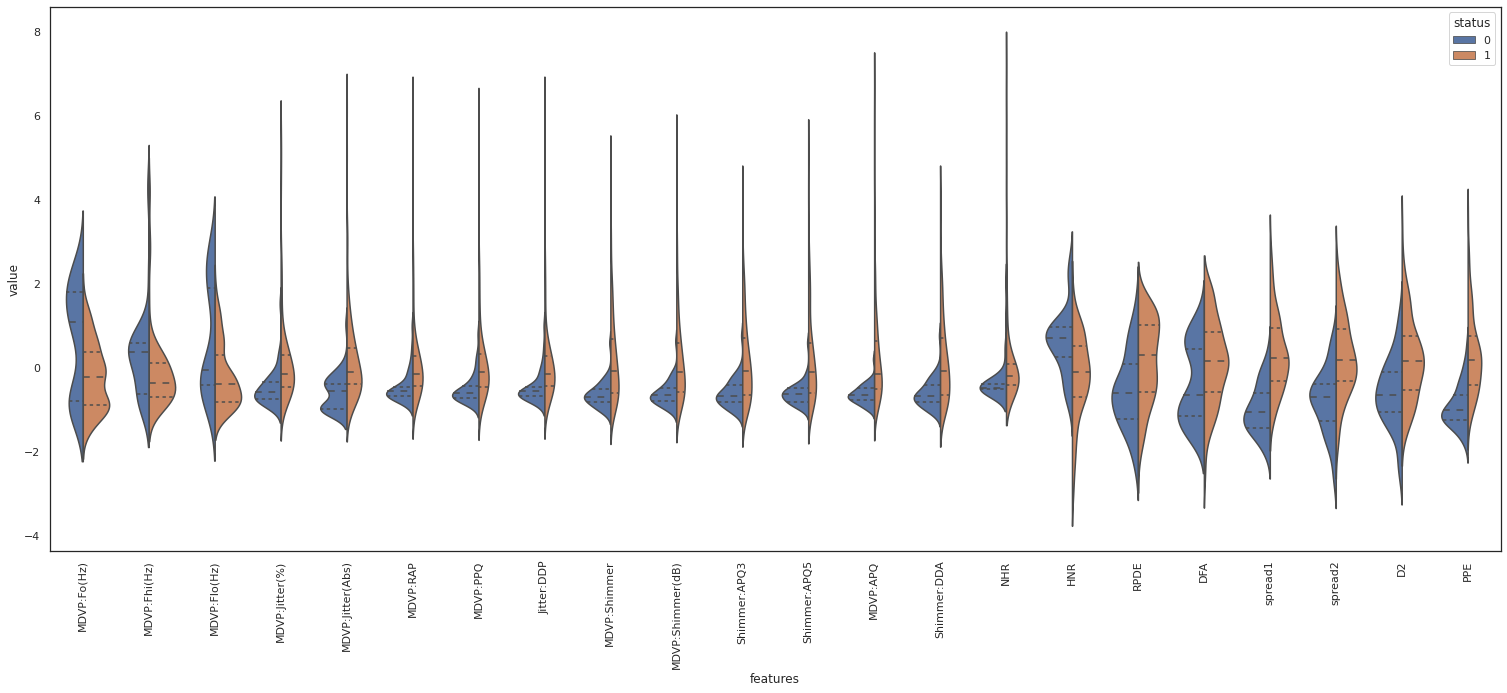

In [125]:
plt.figure(figsize=(26,10))
sns.violinplot(x="features", y="value", hue="status", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

We look at each feature to see how it varies in respect to "status" class label. We normalize data to be able to visualize all features in one plot.

For example PRDE, spread1 and PPE show a separation of their median value fro different values of class label, status. Therefore those variables are important for classification. On the other hand, NHR shows the same median for both classes. So it doesn't carry much information to classify data.


# Box plot alternative

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

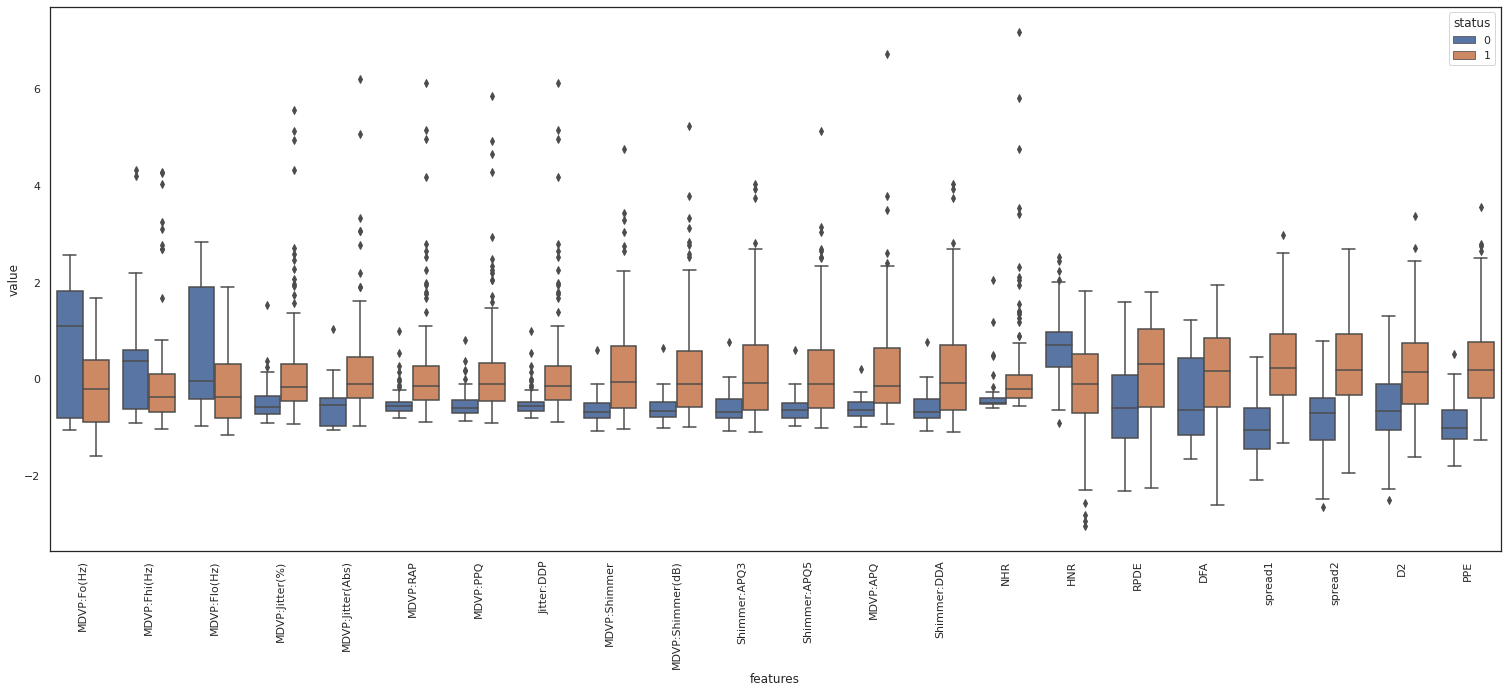

In [126]:
plt.figure(figsize=(26,10))
sns.boxplot(x="features", y="value", hue="status", data=data)
plt.xticks(rotation=90)

From the above box plot we observe that MDVP features have similar range of values and distribution. Provided they are corrolated we can drop the redundant features.

# swarmplot
we can see the individual data points with swarmplot.
spread1and PPE seems to be good features to distinguish different values of status. However, DFA does not see to be able to classifiy status by itself.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

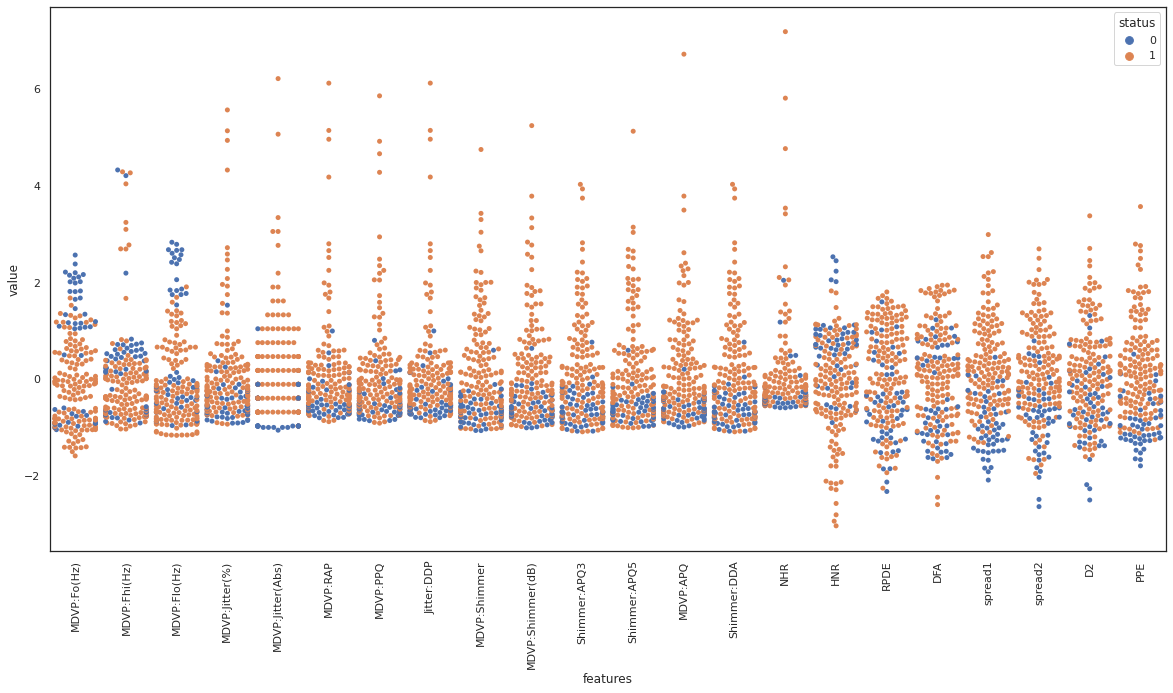

In [127]:
plt.figure(figsize=(20,10))
sns.swarmplot(x="features", y="value", hue="status", data=data)
plt.xticks(rotation=90)

In [128]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

# joinplot
* The above mentioned features are strongly correlated.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


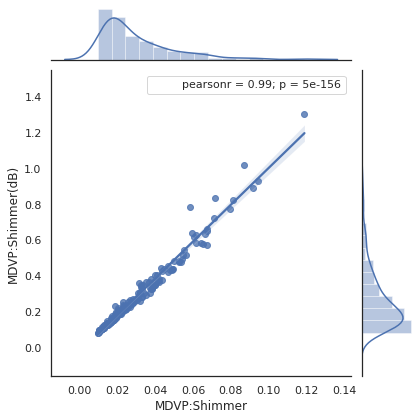

In [129]:
def plot_join_plot(df, feature, target):
  j = sns.jointplot(feature, target, data = df, kind ='reg')
  j.annotate(stats.pearsonr)
  return plt.show()

# plot_join_plot(X, X.loc[:,'MDVP:Shimmer'], X.loc[:,'MDVP:Shimmer(dB)'])
plot_join_plot(X, 'MDVP:Shimmer', 'MDVP:Shimmer(dB)')



# pairplot
The following few features seem to all correlate. We can visualize that with a pairplot.

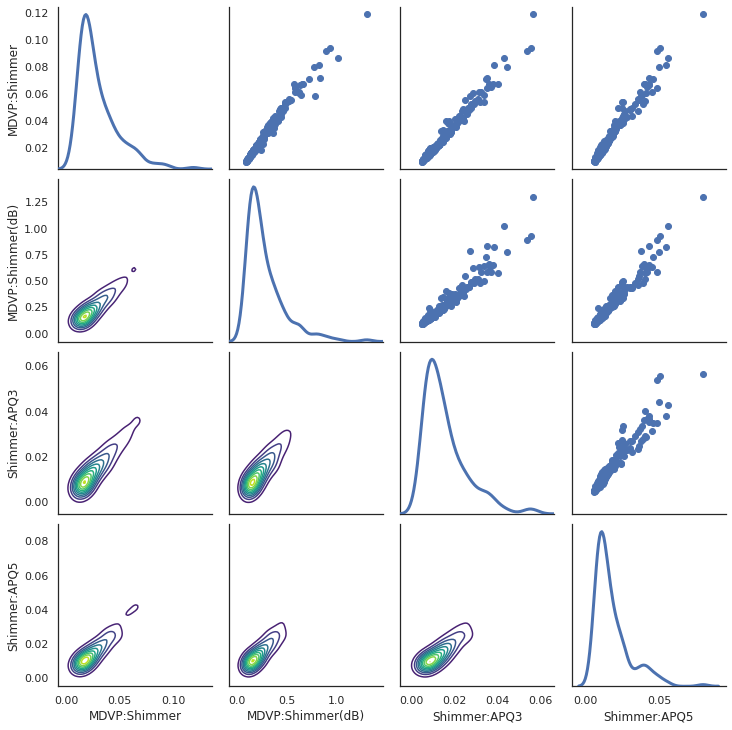

In [130]:
sns.set(style="white")
df1 = X.loc[:,['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5']]
pp = sns.PairGrid(df1, diag_sharey=False)
# pp = sns.PairGrid(df1)

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('corrolated features', fontsize=14)
# plt.show()
pp.map_lower(sns.kdeplot, cmap="viridis")
pp.map_upper(plt.scatter)
pp.map_diag(sns.kdeplot, lw=3)

# Heatmap
We can use heatmap to see the correlation map of entire features.
So here are the 100% linearly correlated features:
* MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP (we keep MDVP:PPQ)
* MDVP:Shimmer, MDVP:Shimmer(dB), 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA' (we keep 'MDVP:APQ')
* spread1, PPE (we keep PPE)

In each group of correlated features we we pick one that has a better separation and distribution based on swarmplot. 



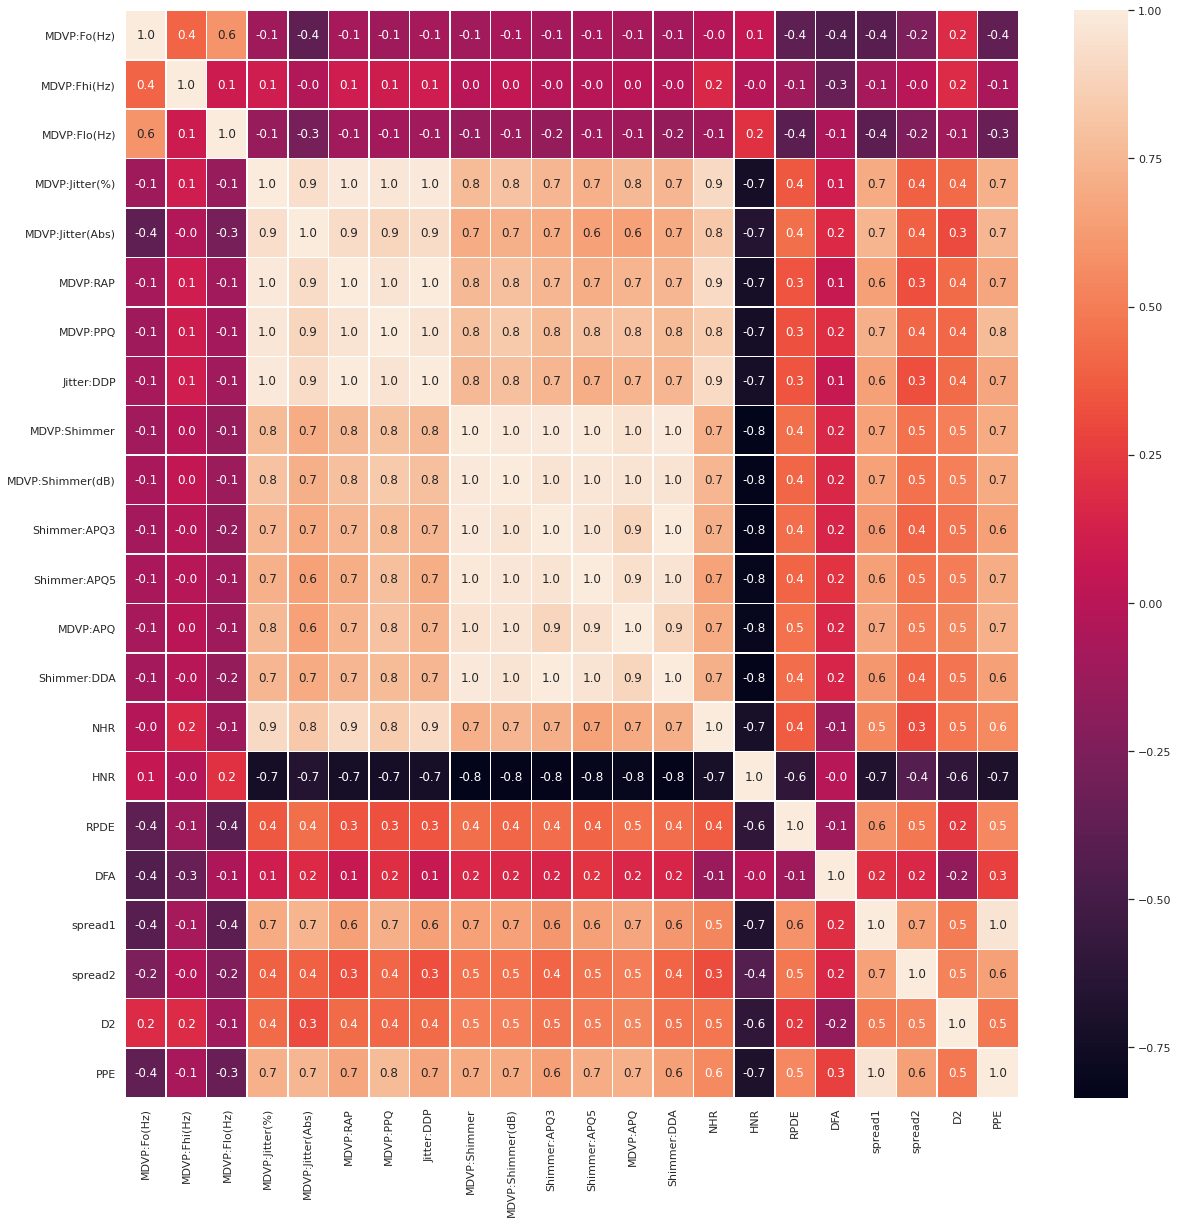

In [131]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

# Drop linearly correlated columns



Alternatively we could have removed the correlated columns as following:

In [134]:
corr_pct = 0.98
col_corr = set()
for i in range(len(X.corr().columns)):
    for j in range(i):
        if abs(X.corr().iloc[i, j]) > corr_pct:
          print(f'{X.corr().columns[i]} and {X.corr().columns[j]} correlated by {X.corr().iloc[i, j]}')
          col = X.corr().columns[i]
          col_corr.add(col)
print(col_corr, len(col_corr), type(col_corr))


MDVP:RAP and MDVP:Jitter(%) correlated by 0.9902755852458308
MDVP:PPQ and MDVP:Jitter(%) correlated by 0.9742563864635716
MDVP:PPQ and MDVP:RAP correlated by 0.9573168930480008
Jitter:DDP and MDVP:Jitter(%) correlated by 0.9902762153275696
Jitter:DDP and MDVP:RAP correlated by 0.999999600104134
Jitter:DDP and MDVP:PPQ correlated by 0.9573191582070278
MDVP:Shimmer(dB) and MDVP:Shimmer correlated by 0.9872578145507641
Shimmer:APQ3 and MDVP:Shimmer correlated by 0.9876250519099836
Shimmer:APQ3 and MDVP:Shimmer(dB) correlated by 0.9631980852351485
Shimmer:APQ5 and MDVP:Shimmer correlated by 0.9828354477070599
Shimmer:APQ5 and MDVP:Shimmer(dB) correlated by 0.9737505606234651
Shimmer:APQ5 and Shimmer:APQ3 correlated by 0.9600697638028982
MDVP:APQ and MDVP:Shimmer correlated by 0.9500828933606194
MDVP:APQ and MDVP:Shimmer(dB) correlated by 0.960976723296103
Shimmer:DDA and MDVP:Shimmer correlated by 0.9876256527301991
Shimmer:DDA and MDVP:Shimmer(dB) correlated by 0.9632017037204208
Shimmer:

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


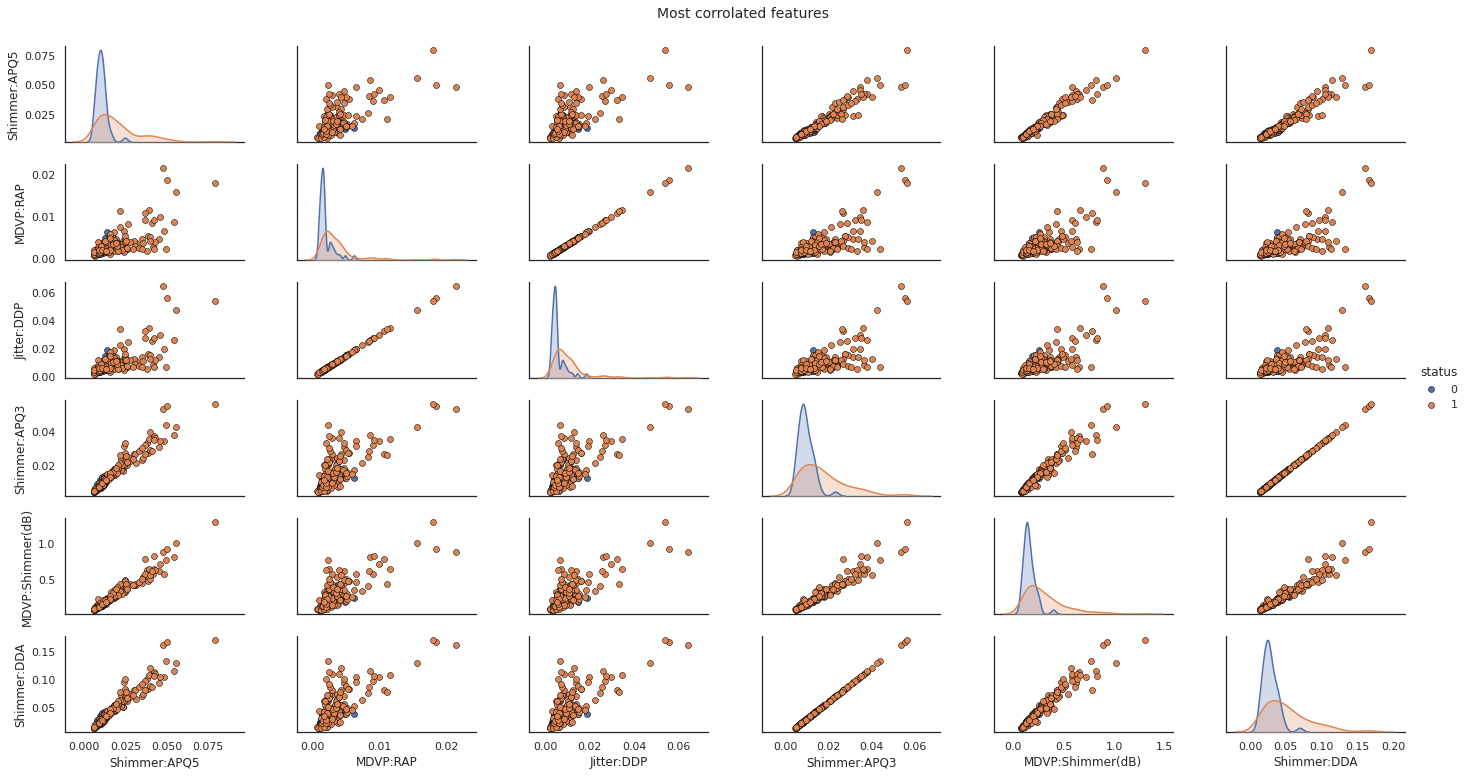

In [133]:
# Scatter Plot with Hue for visualizing data in 3-D
X_join = pd.concat([X[col_corr],y], axis=1)

pp = sns.pairplot(X_join, hue="status", size=1.8, aspect=1.8, 
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Most corrolated features', fontsize=14)
plt.show()

Let's manually drop the columns by inspecting the paiplot and swarmplot and replot the heatmap fro sanity check

In [135]:
col_drop = ['MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:DDA', 'spread1']
X = X.drop(col_drop, axis=1)
X.shape

(195, 13)

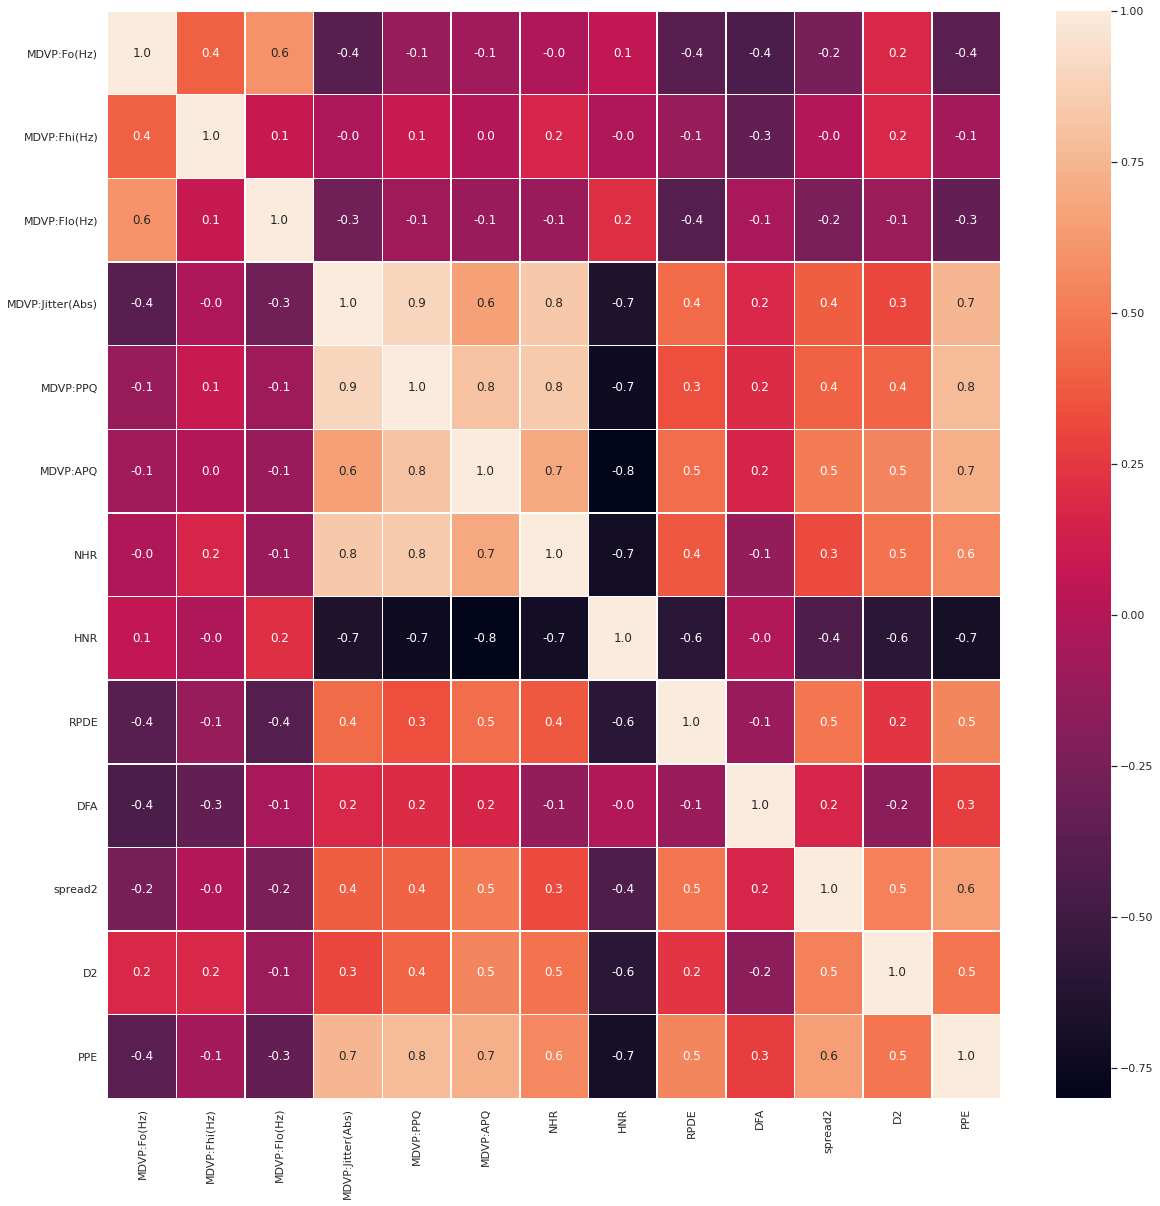

In [107]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

# Remove zero std columns from standardized data





In [71]:
scaler = StandardScaler()
z_fit = scaler.fit_transform(X)

print(z_fit.shape, type(z_fit))

Z = pd.DataFrame(data=z_fit, columns=X.columns)

(195, 13) <class 'numpy.ndarray'>


Normalized std is either zero or one depending if the feature column has the same value or not. Here we don't have any same value feature

In [77]:
# column labels with low standardized std
Z_std = Z.std(axis=0)
col_0std = Z_std[Z_std.le(0.05)].index.values
col_0std

array([], dtype=object)

# Merge cleaned up dataset with class labels
* In case some rows been removed from X we would need to remove the same row from y and vice versa, to align the indices. We do this by inner merge between data and class label.

In [136]:
df = pd.merge(X, y, left_index=True, right_index=True)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
X.shape

(195, 13)

In [137]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:APQ,NHR,HNR,RPDE,DFA,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00007,0.00554,0.02971,0.02211,21.033,0.414783,0.815285,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00008,0.00696,0.04368,0.01929,19.085,0.458359,0.819521,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.00009,0.00781,0.03590,0.01309,20.651,0.429895,0.825288,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00009,0.00698,0.03772,0.01353,20.644,0.434969,0.819235,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.00011,0.00908,0.04465,0.01767,19.649,0.417356,0.823484,0.234513,2.332180,0.410335,1


# PCA Dimension Reduction
Now let's attempt to reduce the dimension of the cleaned up data by Principal Component Analysis method.

First we need to standardized the data, by making it's zero mean zero and unit standard deviation. To achieve this we use StandardScalar utility class.

In [143]:
# scaler = StandardScaler()
z_fit = scaler.fit_transform(X.values)
Z = pd.DataFrame(z_fit, index=X.index, columns=X.columns)
print(z_fit.shape, type(z_fit))

(195, 13) <class 'numpy.ndarray'>


In [144]:
pca = PCA()
pca_features = pca.fit_transform(Z.values)

(195, 13) <class 'numpy.ndarray'>


To decide the number of pricipal components to keep we need to look at the explained variance by each of them, which is commonly known as Scree plot. 

In [145]:
X_var_ratio = X.var()/(X.var().sum())

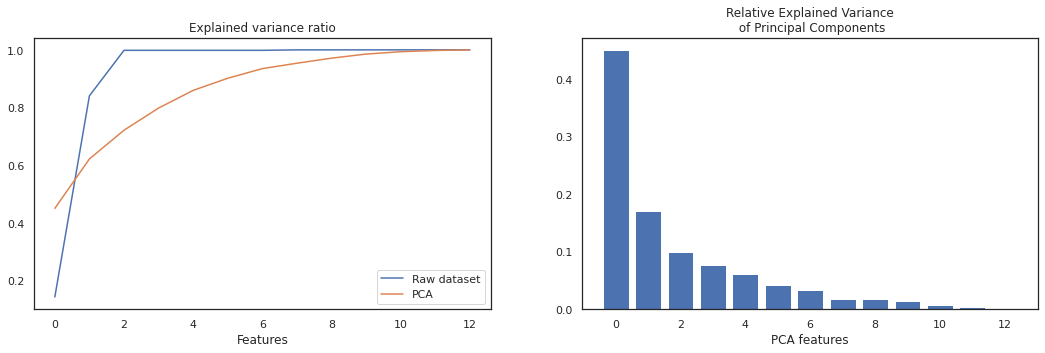

In [146]:
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
ax1.plot(range(len(X.var())), X_var_ratio.cumsum(), label="Raw dataset")
ax1.plot(range(len(X.var())), np.cumsum(pca.explained_variance_ratio_), label="PCA")

ax1.set_title("Explained variance ratio")
ax1.set_xlabel('Features')
ax1.axis('tight')
ax1.legend(loc='lower right')

ax2.bar(x=range(len(X.columns)), height=pca.explained_variance_ratio_)

ax2.set_title('Relative Explained Variance\n of Principal Components')
ax2.set_xlabel('PCA features')

plt.show()

The plot on the right is the Scree plot showing each principal component contribution to the the total retained variance. The one on the left is the cumulative sum of the principal components. 
From the plot above we would need five components to maintain 90% of the data variance.

In [147]:
pca_num = (np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9))[0][0]
pca_num

5

In [148]:
pca = PCA(pca_num)
pca_features = pca.fit_transform(Z.values)
print(pca_features.shape, type(pca_features))

(195, 5) <class 'numpy.ndarray'>


In [150]:
df_pca = pd.DataFrame(pca_features)
df_pca.head(2)

,0,1,2,3,4
0,1.238385,-1.689528,1.223741,-0.212443,1.111227
1,2.623116,-1.342726,1.623372,-1.175761,0.810393


In [176]:
pca_data = pd.melt(pd.concat([df_pca,y], axis=1),id_vars="status", var_name="PCA_features", value_name='value')
pca_data

,status,PCA_features,value
0,1,0,1.238385
1,1,0,2.623116
2,1,0,2.138530
3,1,0,2.340294
4,1,0,2.853460
...,...,...,...
970,0,4,-0.322368
971,0,4,0.103267
972,0,4,0.181372
973,0,4,1.167129


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

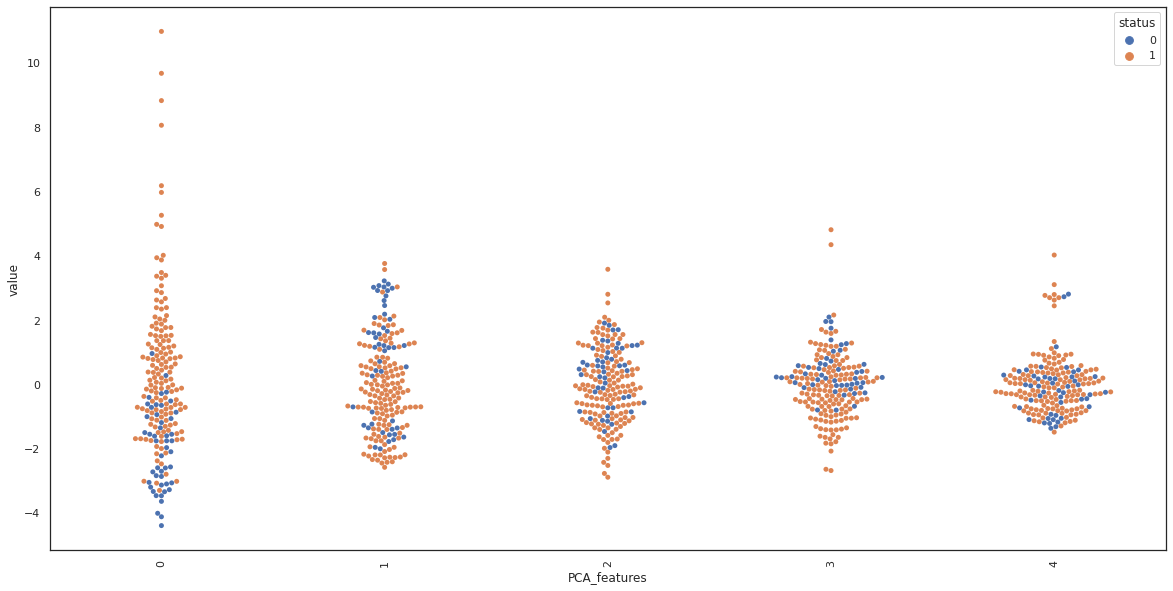

In [177]:
plt.figure(figsize=(20,10))
sns.swarmplot(x="PCA_features", y="value", hue="status", data=pca_data)
plt.xticks(rotation=90)

* 2D plot of the first 2 PCA components.
P0 and P3 are reasonably well separated. Let's see them in scatterplot.

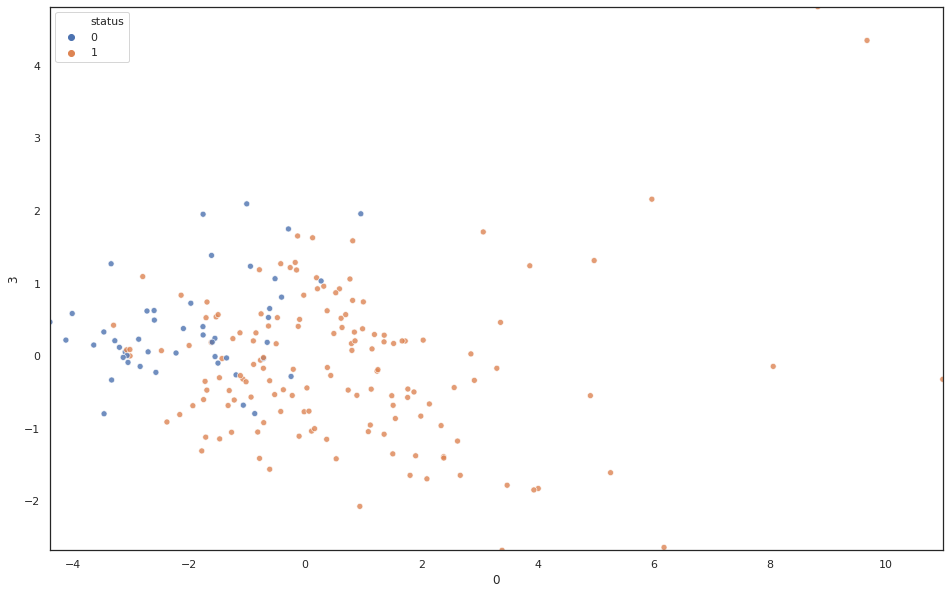

In [178]:
x_data = df_pca.iloc[:,0]
y_data = df_pca.iloc[:,3]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x= x_data, y= y_data,
    hue=y,
    legend="full",
    alpha=0.8
)
plt.xlim(x_data.min(),x_data.max())
plt.ylim(y_data.min(),y_data.max())

plt.show()

# Kmeans

In [153]:
y.value_counts()

1    147
0     48
Name: status, dtype: int64

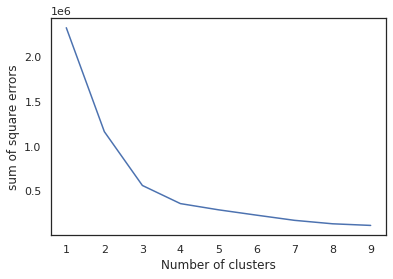

In [156]:
sqr_err = []
for i in range(1,10):
  kmeans = KMeans(i)
  # kmeans.fit(df_pca.values)
  kmeans.fit(X)

  sqr_err.append(kmeans.inertia_)

plt.plot(range(1,10), sqr_err)
plt.xlabel("Number of clusters")
plt.ylabel("sum of square errors")
plt.show()

In [190]:
kmeans=KMeans(2)
kmeans.fit(X)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1]


In [197]:
def swap_label(y, kmeans, swap_key):
  return np.logical_xor(kmeans.labels_,swap_key).astype(int)

KMeans clustering on Raw Data

In [192]:
def scatter_comp(xdata, ydata, y, cluster_label):
  x_data = xdata
  y_data = ydata
  plt.figure(figsize=(16,10))
  
  ax0 = plt.subplot(2,2,1)
  sns.scatterplot(
    x= x_data, y= y_data,
    hue = y,
    cmap='viridis',
    legend="full",
    alpha=1,
    ax=ax0
    )
  ax0.set_xlim(x_data.min(),x_data.max())
  ax0.set_ylim(y_data.min(),y_data.max())
  ax0.set_xlabel(x_data.name)
  ax0.set_ylabel(y_data.name)
  ax0.set_title("Class label")

  ax1 = plt.subplot(2,2,2)
  sns.scatterplot(
    x= x_data, y= y_data,
    hue= cluster_label,
    cmap='viridis',
    legend="full",
    alpha=1,
    ax=ax1
    )
  ax1.set_xlim(x_data.min(),x_data.max())
  ax1.set_ylim(y_data.min(),y_data.max())
  ax1.set_xlabel(x_data.name)
  ax1.set_ylabel(y_data.name)
  ax1.set_title("Cluster Label")

  return plt.show()

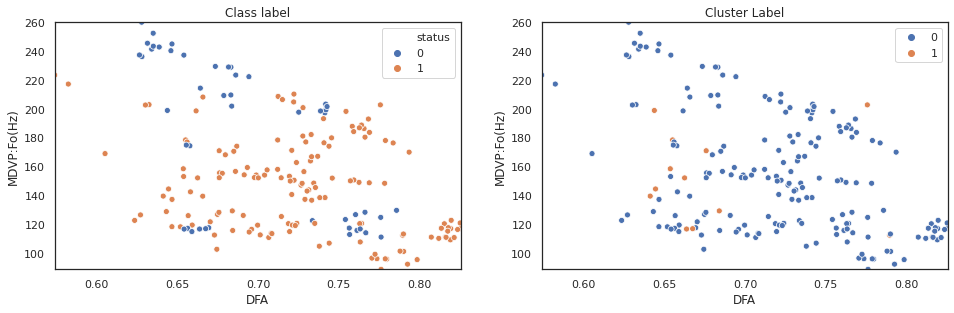

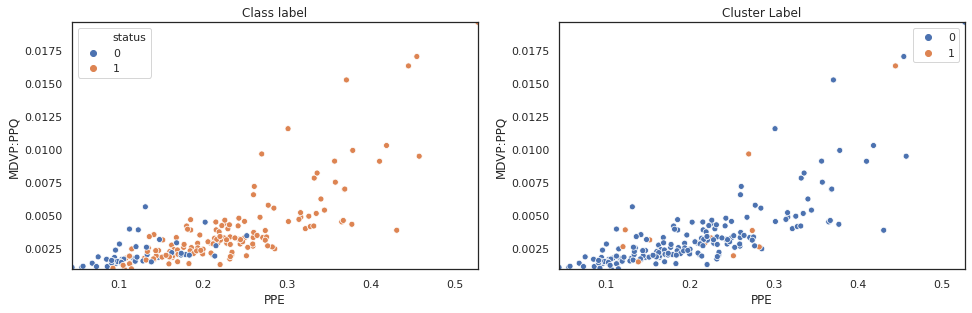

In [199]:
# mix: (DFA, MDVP:Fo(Hz), RPDE)
# Separate: (PPE, MDVP:PPQ)

cluster_label = swap_label(y, kmeans, True)

scatter_comp(X["DFA"], X["MDVP:Fo(Hz)"], y, cluster_label)
scatter_comp(X["PPE"], X["MDVP:PPQ"], y, cluster_label)

This metric is not reliable as the number of rows is small and by swapping the cluster label we could change it.

In [200]:
(y==cluster_label).sum()/len(y)

0.27692307692307694

KMeans clustering on PCA Data

In [201]:
kmeans = KMeans(2)
kmeans.fit(pca_features)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int32)

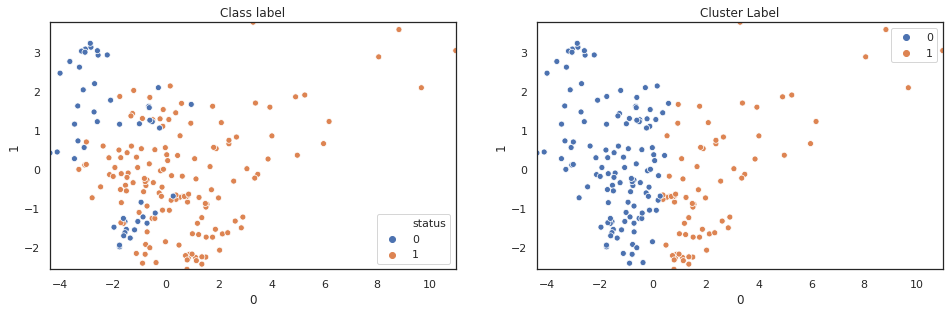

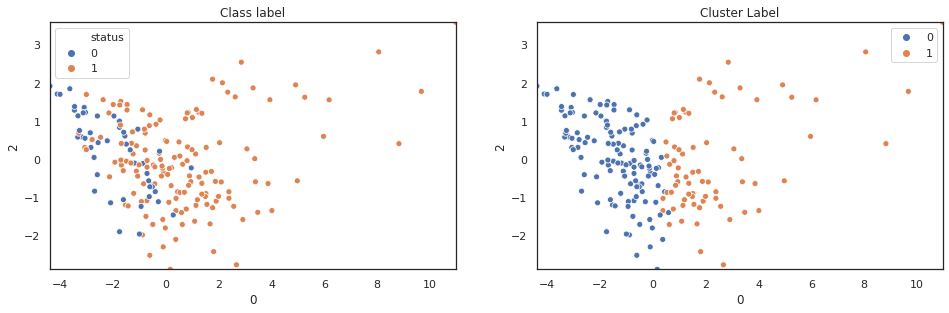

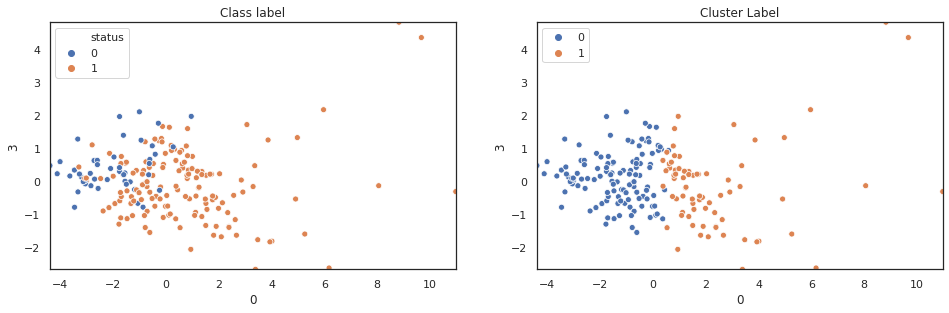

In [203]:
pca_label = swap_label(y, kmeans, False)


scatter_comp(df_pca[0], df_pca[1], y, pca_label)
scatter_comp(df_pca[0], df_pca[2], y, pca_label)
scatter_comp(df_pca[0], df_pca[3], y, pca_label)

In [204]:
(y==pca_label).sum()/len(y)


0.6051282051282051